In [1]:
import repo.utils.mnist_reader as mnist_reader

X_train, y_train = mnist_reader.load_mnist('repo/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('repo/data/fashion', kind='t10k')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 784) (60000,)
(10000, 784) (10000,)


In [2]:
import numpy as np

num_data_points = len(X_train)

X_train_new = []
y_train_new = []

for i in range(num_data_points):
    if y_train[i] == 5:
        X_train_new.append(X_train[i])
        y_train_new.append(0)
    elif y_train[i] == 7:
        X_train_new.append(X_train[i])
        y_train_new.append(1)



X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

X_train = X_train_new
y_train = y_train_new

X_train_og = X_train
y_train_og = y_train

print(X_train.shape)
print(y_train.shape)

(12000, 784)
(12000,)


In [3]:
num_samples_per_case = 1500

np.random.seed(42)

class_0_indices = np.where(y_train== 0)[0]
class_1_indices = np.where(y_train == 1)[0]

class_0_indices = np.random.choice(class_0_indices, num_samples_per_case, replace=False)
class_1_indices = np.random.choice(class_1_indices, num_samples_per_case, replace=False)

X_train_short = np.concatenate([X_train[class_0_indices], X_train[class_1_indices]])
y_train_short = np.concatenate([np.zeros(num_samples_per_case), np.ones(num_samples_per_case)])

indices = np.random.permutation(len(X_train_short))
X_train_short = X_train_short[indices]
y_train_short = y_train_short[indices]

X_train = X_train_short
y_train = y_train_short

print(X_train_short.shape)
print(y_train_short.shape)

# for i in range(6000):
    # print("Printing")
    # print(y_train_short[i])

# for i in range (6000):
#     if i == 3000:
#         print('halfway')
#     print(y_train[i])


(3000, 784)
(3000,)


In [4]:
import numpy as np

num_data_points = len(X_test)

X_test_new = []
y_test_new = []

for i in range(num_data_points):
    if y_test[i] == 5:
        X_test_new.append(X_test[i])
        y_test_new.append(0)
    elif y_test[i] == 7:
        X_test_new.append(X_test[i])
        y_test_new.append(1)

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

X_test = X_test_new
y_test = y_test_new

X_test_og = X_test
y_test_og = y_test

In [5]:
from sklearn.preprocessing import StandardScaler

# Assume X_train and X_test are your training and test feature matrices
scaler = StandardScaler()

# Fit on training data and transform training data
X_train = scaler.fit_transform(X_train)

# Transform test data using the same scaler (without refitting)
X_test = scaler.transform(X_test)


In [6]:
"""Select a probability in the range from 0.1 to 0.3 (e.g., you might pick 0.1, or 0.2, or 0.25,
 etc.). Fix this value, and call it p.
 Now, independently for each example in the training set, flip its label with probability p.
 This is called adding “label noise”. It makes the labels noisy and makes machine learning
 algorithms more likely to overfit"""

p = 0.2 # Probabilty

def flip_labels(y):
    y_noisy = y.copy()
    for i in range(len(y)):
        random_number = np.random.rand() #Random num between 0 and 1
        if random_number < p:
            y_noisy[i] = 1 - y_noisy[i]
    return y_noisy


y_train_noisy = flip_labels(y_train)


#Sanity check
same = 0
diff = 0
for i in range(len(y_train)):
    if y_train[i] == y_train_noisy[i]:
        same += 1
    else:
        diff += 1

print(same, diff)
print(diff / len(y_train))

2387 613
0.20433333333333334


# Now we begin...

# K-fold cross validation

In [10]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

def k_fold_cross_validation(k, ensemble, training_features, labels, gamma, kernel):

    print('in right one')

    print('gamma:', gamma)

    

    num_samples = training_features.shape[0]

    training_features_folds = []
    labels_folds = []

    # Split the data into k folds
    for i in range(k):
        training_features_folds.append(training_features[i * num_samples // k : (i + 1) * num_samples // k])
        labels_folds.append(labels[i * num_samples // k : (i + 1) * num_samples // k])


    best_error = float('inf')
    best_ensemble_value = ensemble[0]

    for value in ensemble:

        print("Ensemble value:", value)

        sum_error = 0
        average_error = 0

        for i in range(k):
            
            training_features_fold = np.vstack([training_features_folds[j] for j in range(k) if j != i])
            training_target_fold = np.hstack([labels_folds[j] for j in range(k) if j != i])

            test_features = training_features_folds[i]
            test_target = labels_folds[i]

            svm = SVC(kernel=kernel, C=value, gamma=gamma)

            # To define
            svm.fit(training_features_fold, training_target_fold)

            predictions = svm.predict(test_features)

            accuracy = accuracy_score(test_target, predictions)

            error = 1 - accuracy

            sum_error = sum_error + error

        average_error = sum_error / (k)

        print("Average Error:", average_error)

        if average_error < best_error:
            print("New best error:", average_error)
            print("New best ensemble value:", value)
            best_error = average_error
            best_ensemble_value = value

    print("Best value:", best_ensemble_value)
    print("Best error:", best_error)

    return best_ensemble_value
        

In [11]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

def k_fold_cross_validation_multi_params(k, ensemble, training_features, labels, kernel):

    
    num_samples = training_features.shape[0]

    training_features_folds = []
    labels_folds = []

    # Split the data into k folds
    for i in range(k):
        training_features_folds.append(training_features[i * num_samples // k : (i + 1) * num_samples // k])
        labels_folds.append(labels[i * num_samples // k : (i + 1) * num_samples // k])


    best_error = float('inf')
    best_ensemble_value = ensemble[0]

    for value in ensemble:

        gamma = value[0]
        C = value[1]

        print("Ensemble value:", value)

        sum_error = 0
        average_error = 0

        for i in range(k):
            
            training_features_fold = np.vstack([training_features_folds[j] for j in range(k) if j != i])
            training_target_fold = np.hstack([labels_folds[j] for j in range(k) if j != i])

            test_features = training_features_folds[i]
            test_target = labels_folds[i]

            svm = SVC(kernel=kernel, C=C, gamma=gamma)

            svm.fit(training_features_fold, training_target_fold)

            predictions = svm.predict(test_features)

            accuracy = accuracy_score(test_target, predictions)

            error = 1 - accuracy

            sum_error = sum_error + error

        average_error = sum_error / (k)

        print("Average Error:", average_error)

        if average_error < best_error:
            print("New best error:", average_error)
            print("New best ensemble value:", value)
            best_error = average_error
            best_ensemble_value = value

    print("Best value:", best_ensemble_value)
    print("Best error:", best_error)

    return best_ensemble_value
        

In [12]:
gamma_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]
c_values = [0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12, 10.24, 20.48, 40.96, 81.92]

best_c_value_gamma_pair = []

for gamma in gamma_values:
    
    best_c = k_fold_cross_validation(5, c_values, X_train, y_train_noisy, gamma, kernel='rbf')

    best_c_value_gamma_pair.append([gamma, best_c])

print(best_c_value_gamma_pair)



in right one
gamma: 1e-05
Ensemble value: 0.02
Average Error: 0.4846666666666666
New best error: 0.4846666666666666
New best ensemble value: 0.02
Ensemble value: 0.04
Average Error: 0.4846666666666666
Ensemble value: 0.08
Average Error: 0.4846666666666666
Ensemble value: 0.16
Average Error: 0.37
New best error: 0.37
New best ensemble value: 0.16
Ensemble value: 0.32
Average Error: 0.32999999999999996
New best error: 0.32999999999999996
New best ensemble value: 0.32
Ensemble value: 0.64
Average Error: 0.2916666666666667
New best error: 0.2916666666666667
New best ensemble value: 0.64
Ensemble value: 1.28
Average Error: 0.28633333333333333
New best error: 0.28633333333333333
New best ensemble value: 1.28
Ensemble value: 2.56
Average Error: 0.2783333333333333
New best error: 0.2783333333333333
New best ensemble value: 2.56
Ensemble value: 5.12
Average Error: 0.26799999999999996
New best error: 0.26799999999999996
New best ensemble value: 5.12
Ensemble value: 10.24
Average Error: 0.2543333

In [13]:
best_gamma_c_pair = k_fold_cross_validation_multi_params(5, best_c_value_gamma_pair, X_train, y_train_noisy, kernel='rbf')


Ensemble value: [1e-05, 40.96]
Average Error: 0.251
New best error: 0.251
New best ensemble value: [1e-05, 40.96]
Ensemble value: [0.0001, 2.56]
Average Error: 0.24733333333333335
New best error: 0.24733333333333335
New best ensemble value: [0.0001, 2.56]
Ensemble value: [0.001, 1.28]
Average Error: 0.23199999999999998
New best error: 0.23199999999999998
New best ensemble value: [0.001, 1.28]
Ensemble value: [0.01, 1.28]
Average Error: 0.255
Ensemble value: [0.1, 1.28]
Average Error: 0.49833333333333335
Best value: [0.001, 1.28]
Best error: 0.23199999999999998


# Final model building with plot!

In [15]:
gamma_c_pairs = best_c_value_gamma_pair

training_errors = []
testing_errors = []

for pair in gamma_c_pairs:
     
    gamma = pair[0]
    C = pair[1]

    svm = SVC(kernel='rbf', C=C, gamma=gamma)

    svm.fit(X_train, y_train_noisy)

    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

    print("Training error:", 1 - training_accuracy)
    print("Testing error:", 1 - testing_accuracy)

    


Training error: 0.05666666666666664
Testing error: 0.0595
Training error: 0.05700000000000005
Testing error: 0.05249999999999999
Training error: 0.048666666666666636
Testing error: 0.03749999999999998
Training error: 0.17900000000000005
Testing error: 0.08099999999999996
Training error: 0.20433333333333337
Testing error: 0.45999999999999996


In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


gammas = [pair[0] for pair in gamma_c_pairs]

def plot_errors(training_errors, testing_errors, title):
    plt.figure(figsize=(10, 6))
    plt.plot(gammas, training_errors, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(gammas, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Gamma')
    plt.ylabel('Error')
    plt.legend()

    plt.xscale('log')


    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

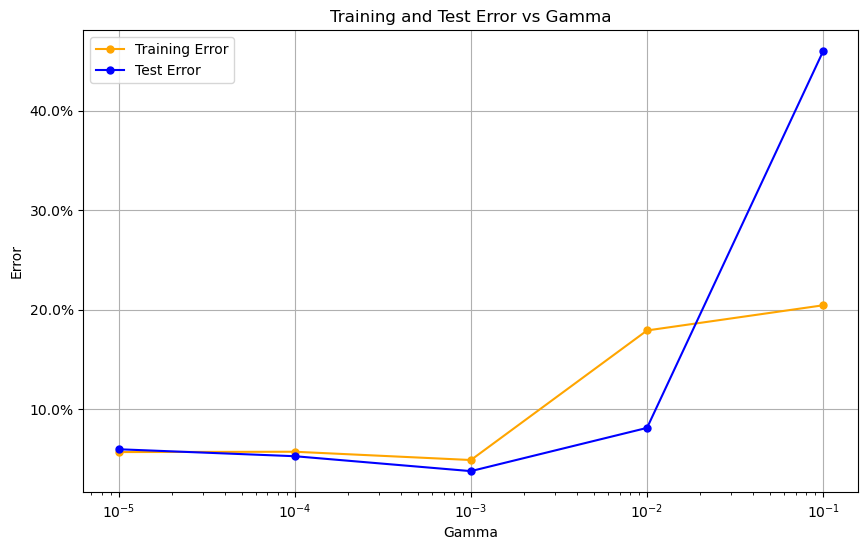

In [17]:
plot_errors(training_errors, testing_errors, 'Training and Test Error vs Gamma')